In [1]:
# 필요한 utils
import pandas as pd
import numpy as np

import sys
sys.path.append("../3.src")
from utils import *

In [2]:
!cat ../3.src/utils.py

from IPython.display import display
import numpy as np


def eda_report(df, name=""):
    print(f"EDA Report for {name}")
    print(f"Shape: {df.shape}")
    display(df.head())
    df.info()
    display(df.describe())
    print(df.isnull().sum())


def building_age(df, year_col='건축년도', new_col='building_age'):
    df[new_col] = 2025 - df[year_col]
    return df


def cal_date_diff_weight(df, col='계약년월', new_col='date_diff'):
    df[col] = df[col].astype(str).str[:4].astype(int)
    df[new_col] = 2025 - df[col]
    return df


def prepare_submission(predictions, test_df):
    
    predictions_rounded = np.round(predictions).astype(int)
    
    # ② 행 수 일치 여부 확인
    assert len(predictions_rounded) == len(test_df), f"제출 행의 갯수 불일치! test_df={len(test_df)}, predictions={len(predictions_rounded)}"
    
    print(f"제출용 예측값 생성 완료. 행 개수 일치: {len(predictions_rounded)}")
    
    return predictions_rounded


In [3]:
# 3. csv 파일 불러오기
DATA_PATH = "/data/ephemeral/home/workspace/upstageailab-ml-competition-ml-2/1.Data/"
train_df = pd.read_csv(DATA_PATH + "train.csv")
test_df = pd.read_csv(DATA_PATH + "test.csv")

subway_df = pd.read_csv(DATA_PATH + "subway_feature.csv")
bus_df = pd.read_csv(DATA_PATH + "bus_feature.csv")

/tmp/ipykernel_543119/517515685.py:3: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(DATA_PATH + "train.csv")


In [4]:
# train 데이터와 test 데이터 하나로 합치기! 
train_df['is_train'] = 1
test_df['is_train'] = 0
all_df = pd.concat([train_df, test_df], ignore_index= True)

In [5]:
all_df['is_train'].value_counts()   

1    1118822
0       9272
Name: is_train, dtype: int64

In [6]:
all_df = all_df.rename(columns={'전용면적(㎡)': '전용면적'})

In [7]:
eda_report(all_df, "all data")
# all_df['전용면적'].value_counts()   

EDA Report for all data
Shape: (1128094, 53)


,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_train
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 53 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null  float64
 3   부번                      1128019 non-null  float64
 4   아파트명                    1125958 non-null  object 
 5   전용면적                    1128094 non-null  float64
 6   계약년월                    1128094 non-null  int64  
 7   계약일                     1128094 non-null  int64  
 8   층                       1128094 non-null  int64  
 9   건축년도                    1128094 non-null  int64  
 10  도로명                     1128094 non-null  object 
 11  해제사유발생일                 6195 non-null     float64
 12  등기신청일자                  1128094 non-null  object 
 13  거래유형                    1128094 non-null  object 
 14  중개

,본번,부번,전용면적,계약년월,계약일,층,건축년도,해제사유발생일,단지소개기존clob,k-전체동수,...,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target,is_train
count,1.128019e+06,1.128019e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,6.195000e+03,69136.000000,250887.000000,...,251924.000000,251924.000000,251924.000000,329.0,2.518150e+05,251817.000000,251862.000000,251862.000000,1.118822e+06,1.128094e+06
mean,5.653234e+02,5.976400e+00,7.716028e+01,2.014829e+05,1.579966e+01,8.881412e+00,1.998791e+03,2.021126e+07,541.272911,14.810871,...,478.582326,478.585657,167.784911,70.0,1.904915e+05,1068.300798,126.995315,37.545760,5.799153e+04,9.917808e-01
std,5.167611e+02,4.674920e+01,2.936448e+01,4.237691e+02,8.722162e+00,5.989302e+00,9.358540e+00,1.105703e+04,751.682988,17.682771,...,758.970556,731.168009,249.626494,0.0,1.735029e+06,1247.315587,0.091001,0.052457,4.642602e+04,9.028635e-02
min,0.000000e+00,0.000000e+00,1.002000e+01,2.007010e+05,1.000000e+00,-4.000000e+00,1.961000e+03,2.020022e+07,1.000000,1.000000,...,0.000000,0.000000,0.000000,70.0,0.000000e+00,0.000000,126.798318,37.447843,3.500000e+02,0.000000e+00
25%,1.770000e+02,0.000000e+00,5.965000e+01,2.011110e+05,8.000000e+00,4.000000e+00,1.992000e+03,2.020083e+07,4.000000,5.000000,...,48.000000,95.000000,0.000000,70.0,0.000000e+00,316.000000,126.913157,37.498830,3.050000e+04,1.000000e+00
50%,4.710000e+02,0.000000e+00,8.187000e+01,2.015080e+05,1.600000e+01,8.000000e+00,2.000000e+03,2.021032e+07,159.000000,10.000000,...,226.000000,258.000000,64.000000,70.0,1.735000e+03,683.000000,127.014971,37.544936,4.480000e+04,1.000000e+00
75%,7.810000e+02,1.000000e+00,8.496000e+01,2.018050e+05,2.300000e+01,1.200000e+01,2.005000e+03,2.022050e+07,725.000000,17.000000,...,576.000000,582.000000,237.000000,70.0,8.414210e+03,1284.000000,127.059590,37.577117,6.980000e+04,1.000000e+00
max,4.974000e+03,2.837000e+03,4.243200e+02,2.023090e+05,3.100000e+01,6.900000e+01,2.023000e+03,2.023093e+07,2888.000000,124.000000,...,4975.000000,5132.000000,1500.000000,70.0,3.159620e+07,12096.000000,127.179998,37.687725,1.450000e+06,1.000000e+00


시군구                             0
번지                            227
본번                             75
부번                             75
아파트명                         2136
전용면적                            0
계약년월                            0
계약일                             0
층                               0
건축년도                            0
도로명                             0
해제사유발생일                   1121899
등기신청일자                          0
거래유형                            0
중개사소재지                          0
k-단지분류(아파트,주상복합등등)         877273
k-전화번호                     876850
k-팩스번호                     879348
단지소개기존clob                1058958
k-세대타입(분양형태)               876125
k-관리방식                     876125
k-복도유형                     876454
k-난방방식                     876125
k-전체동수                     877207
k-전체세대수                    876125
k-건설사(시공사)                 877637
k-시행사                      877834
k-사용검사일-사용승인일              876259
k-연면적                      876125
k-주거전용면적      

In [8]:
# 결측치, 이상치 처리 보다 featrure engineering 먼저 진행해보기로 결정 (파생 변수 생성)

# 파생 변수 1. building_age
all_df['building_age'] = all_df['건축년도'].apply(lambda x : 2025 - x if x != 0 else 0)

In [9]:
# 파생 변수 1. building_age 확인
all_df['building_age'].value_counts()

21    68919
22    66039
26    60262
25    57250
37    55953
20    48648
27    44325
24    42574
28    42531
23    42174
17    37540
19    35168
33    32792
29    32341
32    30694
18    29929
30    27218
31    25902
38    25781
16    24260
36    23829
39    23494
15    21178
14    20480
11    17433
13    16555
35    15800
34    15336
42    14293
12    13559
43    11800
41    10671
45     9820
10     8965
9      8558
47     8128
40     8097
46     7069
44     5225
6      5195
7      5106
8      4869
51     3444
5      3084
49     2665
54     2407
48     2329
50     2187
4      1951
52     1049
3       761
55      689
53      685
56      537
57      253
59      105
2        99
64       55
58       17
60       17
Name: building_age, dtype: int64

In [10]:
# 파생 변수 2. years_diff_since_contract
all_df['years_diff_since_contract'] = np.where(
    (all_df['계약년월'].notnull()) & (all_df['계약년월'] != 0)
    ,2025 - all_df['계약년월'].astype(str).str[:4].astype(int)
    ,0
)

    

# all_df['years_diff_since_contract'] = all_df['계약년월'].apply(lambda x : 2025 - int(str(x)[:4]) if pd.notnull(x) and x != 0 else 0)

In [11]:
# 파생 변수 2. years_diff_since_contract 확인
all_df['years_diff_since_contract'].value_counts()

10    119891
8     104893
9      99253
11     85130
5      83711
7      81413
6      74696
16     73491
12     67865
18     58767
17     57012
14     54513
15     44457
4      43117
13     40851
2      26820
3      12214
Name: years_diff_since_contract, dtype: int64

In [12]:
# 파생 변수 3. parking_per_household
all_df['parking_per_household'] = np.where(
    (all_df['주차대수'].notnull()) & (all_df['k-전체세대수'].notnull()) & (all_df['k-전체세대수'] != 0),
    all_df['주차대수'] / all_df['k-전체세대수'],
    0        
) 

In [13]:
# 파생 변수 3. parking_per_household 확인
all_df['parking_per_household'].value_counts()

0.000000    894418
0.000397      2816
0.944593      2605
0.682866      2592
0.382244      2480
             ...  
1.852227         2
1.314655         2
0.596091         2
1.016461         1
0.260215         1
Name: parking_per_household, Length: 673, dtype: int64

In [14]:
valid_mask = all_df[['좌표X', '좌표Y']].notnull().all(axis=1)
valid_rows = all_df[valid_mask]

In [15]:
# 파생 변수 4. nearnest_distance_to_bus  &  num_bus_stops_within_1000m
from sklearn.neighbors import BallTree

valid_mask = all_df[['좌표X', '좌표Y']].notnull().all(axis=1)
valid_rows = all_df[valid_mask].copy()

bus_radians = np.radians(bus_df[['Y좌표', 'X좌표']].values)
valid_radians = np.radians(valid_rows[['좌표Y', '좌표X']].values)

tree = BallTree(bus_radians, metric='haversine')

# 1)  nearnest_distance_to_bus 
distances, indices = tree.query(valid_radians, k=1)

valid_rows['nearnest_distance_to_bus'] = distances[:, 0] * 6371  

all_df.loc[valid_mask, 'nearnest_distance_to_bus'] = valid_rows['nearnest_distance_to_bus']
all_df.loc[~valid_mask, 'nearnest_distance_to_bus'] = 9999

# 2) num_bus_stops_within_1000m
radius_km = 1.0
radius_rad = radius_km / 6371.0  

indices_array = tree.query_radius(valid_radians, r=radius_rad)

valid_rows['num_bus_stops_within_1000m'] = [len(indices) for indices in indices_array]

all_df['num_bus_stops_within_1000m'] = 0
all_df.loc[valid_mask, 'num_bus_stops_within_1000m'] = valid_rows['num_bus_stops_within_1000m'].values



In [16]:
# 파생 변수 4. nearnest_distance_to_bus  &  num_bus_stops_within_1000m 확인
# all_df[(all_df['nearnest_distance_to_bus']!=9999) & (all_df['num_bus_stops_within_1000m']!= 0)][[
#     'is_train',
#     'nearnest_distance_to_bus',
#     'num_bus_stops_within_1000m'
# ]].value_counts()

filtered_df = all_df[(all_df['nearnest_distance_to_bus']!=9999) & (all_df['num_bus_stops_within_1000m']!= 0)]

null_check_mask = (
    filtered_df['nearnest_distance_to_bus'].isnull() |
    filtered_df['num_bus_stops_within_1000m'].isnull() 
)

print(null_check_mask.sum())




0


In [17]:
# 파생 변수 5. nearnest_distance_to_subway   &  num_subway_within_1000m

valid_mask = all_df[['좌표X', '좌표Y']].notnull().all(axis=1)
valid_rows = all_df[valid_mask].copy()

subway_radians = np.radians(subway_df[['위도', '경도']].values)
valid_radians = np.radians(valid_rows[['좌표Y', '좌표X']].values)

tree = BallTree(subway_radians, metric='haversine')

# 1)  nearnest_distance_to_subway 
distances, indices = tree.query(valid_radians, k=1)

valid_rows['nearnest_distance_to_subway'] = distances[:, 0] * 6371  

all_df.loc[valid_mask, 'nearnest_distance_to_subway'] = valid_rows['nearnest_distance_to_subway']
all_df.loc[~valid_mask, 'nearnest_distance_to_subway'] = 9999




# 2) num_subway_within_1000m
radius_km = 1.0
radius_rad = radius_km / 6371.0  

indices_array = tree.query_radius(valid_radians, r=radius_rad)

valid_rows['num_subway_within_1000m'] = [len(indices) for indices in indices_array]

all_df['num_subway_within_1000m'] = 0
all_df.loc[valid_mask, 'num_subway_within_1000m'] = valid_rows['num_bus_stops_within_1000m'].values

In [18]:
# 파생 변수 5. nearnest_distance_to_subway   &  num_subway_within_1000m 확인

filtered_df = all_df[(all_df['nearnest_distance_to_subway']!=9999 ) & (all_df['num_subway_within_1000m'] !=0) ]
null_check_mask =(
    filtered_df['nearnest_distance_to_subway'].isnull() |
    filtered_df['num_subway_within_1000m'].isnull()
)

print(null_check_mask.sum())


0


In [19]:
%pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [20]:
# 파생 변수 6. dist_to_CBD,  dist_to_Gangnam, dist_to_Yeouido
from haversine import haversine

center_coords = {
    'CBD':     (37.5714, 126.9768),
    'Gangnam': (37.4979, 127.0276),
    'Yeouido': (37.5219, 126.9245)
}

all_df['dist_to_CBD'] = all_df.apply(lambda row : haversine((row['좌표Y'], row['좌표X']), center_coords['CBD']) if pd.notnull(row['좌표X']) and pd.notnull(row['좌표Y']) else 9999, axis=1)
all_df['dist_to_Gangnam'] = all_df.apply(lambda row : haversine((row['좌표Y'], row['좌표X']), center_coords['Gangnam']) if pd.notnull(row['좌표X']) and pd.notnull(row['좌표Y']) else 9999 , axis=1)
all_df['dist_to_Yeouido'] = all_df.apply(lambda row : haversine((row['좌표Y'], row['좌표X']), center_coords['Yeouido']) if pd.notnull(row['좌표X']) and pd.notnull(row['좌표Y']) else 9999 , axis=1)


Correlation with target:
 building_age                  -0.056041
years_diff_since_contract     -0.344328
parking_per_household          0.204521
nearnest_distance_to_bus      -0.120850
num_bus_stops_within_1000m     0.075198
nearnest_distance_to_subway   -0.120853
num_subway_within_1000m        0.075198
dist_to_CBD                   -0.120862
dist_to_Gangnam               -0.120997
dist_to_Yeouido               -0.120881
dtype: float64


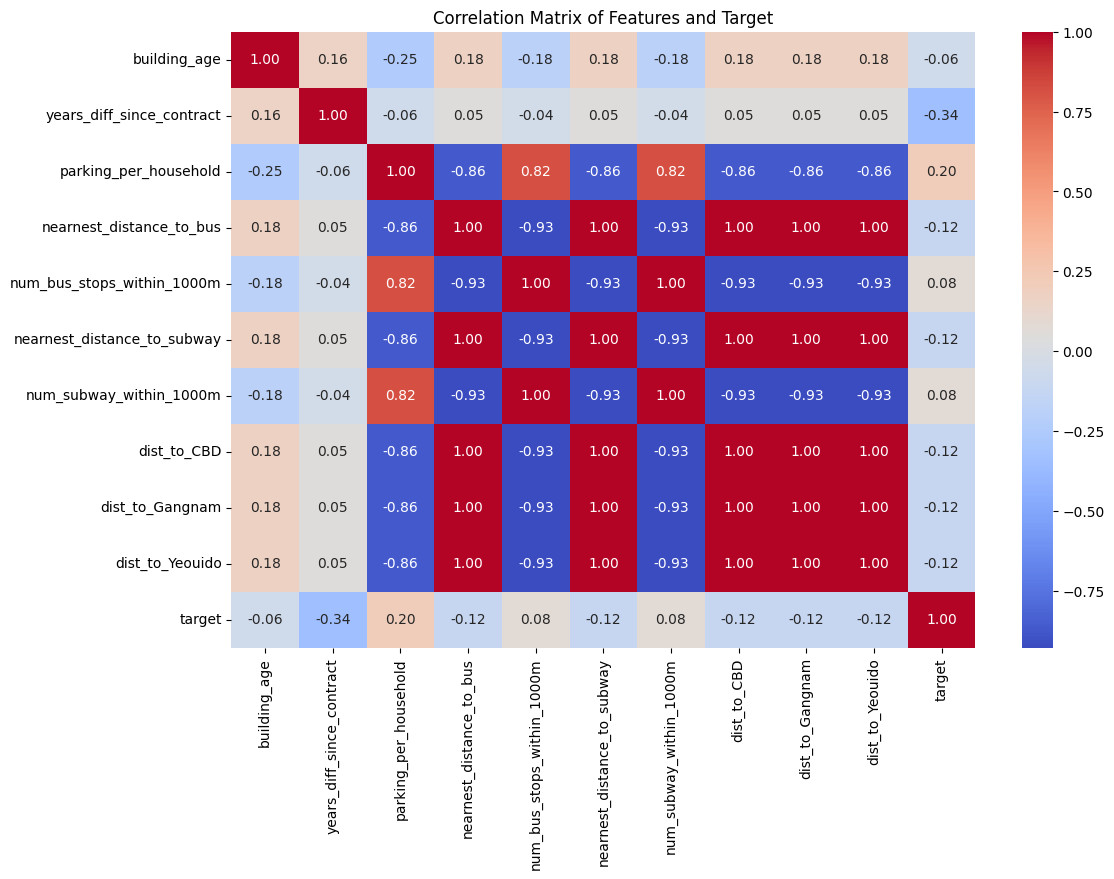

In [30]:
# 생성한 파생변수와 target 과의 상관관계 분석해보기!!!
# 
# 파생 변수 1. building_age
# 파생 변수 2. years_diff_since_contract
# 파생 변수 3. parking_per_household
# 파생 변수 4. nearnest_distance_to_bus  &  num_bus_stops_within_1000m
# 파생 변수 5. nearnest_distance_to_subway   &  num_subway_within_1000m
# 파생 변수 6. dist_to_CBD,  dist_to_Gangnam, dist_to_Yeouido

import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = all_df[all_df['is_train'] == 1]

cols = [
    'building_age', 'years_diff_since_contract', 'parking_per_household',
    'nearnest_distance_to_bus', 'num_bus_stops_within_1000m',
    'nearnest_distance_to_subway', 'num_subway_within_1000m',
    'dist_to_CBD', 'dist_to_Gangnam', 'dist_to_Yeouido',
    'target'
]

print("Correlation with target:\n", filtered_df[
    ['building_age', 'years_diff_since_contract', 'parking_per_household',
    'nearnest_distance_to_bus', 'num_bus_stops_within_1000m',
    'nearnest_distance_to_subway', 'num_subway_within_1000m',
    'dist_to_CBD', 'dist_to_Gangnam', 'dist_to_Yeouido']
    ].corrwith(filtered_df['target']))

corr_matrix_with_target = filtered_df[cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_with_target, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features and Target')
plt.show()

In [ ]:
# 생성한 파생변수 끼리의 상관관계 분석해보기!!!
corr_matrix_with_derived_var = filtered_df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_with_derived_var, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between features")
plt.show()

# 3. 상관 높은 쌍 찾기 
threshold = 0.8
for i in range(len(corr_matrix_with_derived_var.columns)):
    for j in range(i):
        if abs(corr_matrix_with_derived_var.iloc[i,j]) > threshold:
            print(f" High correlation: {corr_matrix_with_derived_var.index[i]} vs {corr_matrix_with_derived_var.columns[j]} = {corr_matrix_with_derived_var.iloc[i,j]:.2f}")


# 다중공산성 문제를 얘기할 수 있는 부분 : 교통 근접성
# nearnest_distance_to_bus
# num_bus_stops_within_1000m
# nearnest_distance_to_subway
# num_subway_within_1000m

In [ ]:
# 파생 변수 1. building_age
# 파생 변수 2. years_diff_since_contract
# 파생 변수 3. parking_per_household
# 파생 변수 4. nearnest_distance_to_bus  &  num_bus_stops_within_1000m
# 파생 변수 5. nearnest_distance_to_subway   &  num_subway_within_1000m
# 파생 변수 6. dist_to_CBD,  dist_to_Gangnam, dist_to_Yeouido


# 파생 변수 4, 5 를  transport_score 로 합치기!

# 거리가 짧을수록 점수가 커지도록...
all_df['inv_nearnest_distance_to_bus'] = 1 / (1 + all_df['nearnest_distance_to_bus'])
all_df['inv_nearnest_distance_to_subway'] = 1 / (1 + all_df['nearnest_distance_to_subway'])

all_df['transport_score'] = (
    all_df['inv_nearnest_distance_to_bus'] +
    all_df['num_bus_stops_within_1000m'] +
    all_df['inv_nearnest_distance_to_subway'] +
    all_df['num_subway_within_1000m']
)

In [35]:
# EDA  1) 결측치 : 80% 이하만 데이터로 활용!  all_df_no_nan
missing_check_mask = all_df.isnull() | all_df.isna() | (all_df == ' ') | (all_df == '-') | (all_df == 'nan')

missing_counts = missing_check_mask.sum()
missing_ratio = missing_counts / len(all_df) 

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Ratio': missing_ratio
})

# print(missing_summary.sort_values(by='Missing Ratio', ascending=False).head(20))

columns_to_keep = missing_ratio[missing_ratio < 0.8].index
# print(columns_to_keep)

all_df_no_nan = all_df[columns_to_keep]




In [36]:
# EDA  2) 본번, 부번 float → str
all_df_no_nan['본번'] = all_df_no_nan['본번'].astype(str)
all_df_no_nan['부번'] = all_df_no_nan['부번'].astype(str)

/tmp/ipykernel_543119/2784026796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_no_nan['본번'] = all_df_no_nan['본번'].astype(str)
/tmp/ipykernel_543119/2784026796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_no_nan['부번'] = all_df_no_nan['부번'].astype(str)


In [37]:
# EDA  3) 결측치 보간
all_df_no_nan.isnull().sum().sort_values(ascending=False)

continous_cols =[]
categorical_cols =[]

for col in all_df_no_nan.columns:
    if pd.api.types.is_numeric_dtype(all_df_no_nan[col]):
        continous_cols.append(col)
    else:
        categorical_cols.append(col)
            


In [38]:
# EDA  3) 결측치 보간 - 범주형은 null 로 , 수치형은 선형보간으로

# 범주형은 null
all_df_no_nan[categorical_cols] = all_df_no_nan[categorical_cols].fillna('NULL')

# 수치형은 선형 보간
all_df_no_nan[continous_cols] = all_df_no_nan[continous_cols].interpolate(method='linear', axis=0)

/tmp/ipykernel_543119/3439374655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_no_nan[categorical_cols] = all_df_no_nan[categorical_cols].fillna('NULL')
/tmp/ipykernel_543119/3439374655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_no_nan[continous_cols] = all_df_no_nan[continous_cols].interpolate(method='linear', axis=0)


In [26]:
# EDA  4) 이상치 제거 - IQR (all_df_no_nan 에서 is_train ==1 인 데이터에서만 이상치 행을 제거!!)

# def remove_outliers_iqr(df, col_name):
#     Q1 = df[col_name].quantile(0.25)
#     Q3 = df[col_name].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

# # is_train ==1 인 데이터에서만   전용면적에 대한 이상치 제거
# final_df = pd.concat([
#     all_df_no_nan[all_df_no_nan['is_train']==0] 
#     ,remove_outliers_iqr(all_df_no_nan[all_df_no_nan['is_train']== 1], '전용면적')
#     ])



In [ ]:
#  is_train == 1 인 데이터에서만 이상치가 제거 되었는지 확인
# print(all_df_no_nan[all_df_no_nan['is_train']==0].shape, all_df_no_nan[all_df_no_nan['is_train']==1].shape, 
#       final_df[final_df['is_train']==0].shape, 
#       final_df[final_df['is_train']==1].shape,
#       final_df.shape)

(9272, 54) (1118822, 54) (9272, 54) (1029574, 54) (1038846, 54)


In [ ]:
for col in categorical_cols:
    num_unique = all_df_no_nan[col].nunique()
    print(f"{col} : {num_unique} 개 카테고리")

In [39]:
# EDA  5) 범주형 변수 처리 - label encoding
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [40]:
# 나중에 후처리/복원/변환할 때 재사용하기 위해 컬럼 별로 학습된 label endocer 객체를 딕셔너리에 저장!
label_encoders ={}

final_train = all_df_no_nan[all_df_no_nan['is_train'] == 1].copy()
final_test = all_df_no_nan[all_df_no_nan['is_train'] == 0].copy()

for col in tqdm(categorical_cols):
    le = LabelEncoder()

    le.fit(final_train[col].astype(str))
    final_train[col] =le.transform(final_train[col].astype(str))
    label_encoders[col] = le

    for label in final_test[col].unique():
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)

    final_test[col] = le.transform(final_test[col].astype(str))      


final_df = pd.concat([final_train, final_test], ignore_index=True)

100%|██████████| 25/25 [00:06<00:00,  3.91it/s]


In [51]:
# Feature Selection 을 위해  임시로  RandomForestRegressor 한 번 돌려보기

from sklearn.ensemble import RandomForestRegressor

train_data = final_df[final_df['is_train'] == 1]
test_data  = final_df[final_df['is_train'] == 0]

y_train = train_data['target']
y_train_log = np.log1p(y_train)
X_train = train_data.drop(['target'], axis=1)

rf_temp = RandomForestRegressor(
    n_estimators=40,
    criterion='squared_error',
    random_state=42,
    n_jobs=-1,
    max_depth=20
)


rf_temp.fit(X_train, y_train_log)

feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_temp.feature_importances_
})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# 표로 확인
print(feature_importances)

                            feature  importance
5                              전용면적    0.447304
6                              계약년월    0.194833
0                               시군구    0.134759
9                              건축년도    0.037068
43                     building_age    0.034218
51                  dist_to_Gangnam    0.024869
40                              좌표Y    0.024068
3                                부번    0.014454
10                              도로명    0.014082
4                              아파트명    0.011549
39                              좌표X    0.009484
1                                번지    0.008320
2                                본번    0.007698
8                                 층    0.003350
26               k-전용면적별세대현황(60㎡이하)    0.003023
33                             건축면적    0.002883
23                            k-연면적    0.002663
27           k-전용면적별세대현황(60㎡~85㎡이하)    0.002434
34                             주차대수    0.002191
17                           k-난방방식    0

In [52]:
threshold = 0.005
selected_features = feature_importances[feature_importances['importance'] >= threshold]['feature'].tolist()

print(f"Selected Features {len(selected_features)}:", selected_features)

Selected Features 13: ['전용면적', '계약년월', '시군구', '건축년도', 'building_age', 'dist_to_Gangnam', '좌표Y', '부번', '도로명', '아파트명', '좌표X', '번지', '본번']


In [60]:
#  feature select 없이 모든 데이터 활용하면? 

X_train_selected = X_train


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_training, X_validation, y_training, y_validation = train_test_split(X_train_selected, y_train_log, test_size=0.2, random_state=42)


rf_log_model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    random_state=42,
    n_jobs=-1,
    max_depth=20,
)

rf_log_model.fit(X_training, y_training)

y_pred_log = rf_log_model.predict(X_validation)
y_pred = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(np.expm1(y_validation), y_pred))
print(f"Validation RMSE: {rmse:.2f}")



Validation RMSE: 7956.62


In [53]:
# 선택된 feature만 활용!! 
# y_train_log = np.log1p(y_train)

X_train_selected = X_train[selected_features]
test_data_selected = test_data[selected_features]

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_training, X_validation, y_training, y_validation = train_test_split(X_train_selected, y_train_log, test_size=0.2, random_state=42)


rf_log_model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    random_state=42,
    n_jobs=-1,
    max_depth=20,
)

rf_log_model.fit(X_training, y_training)

y_pred_log = rf_log_model.predict(X_validation)
y_pred = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(np.expm1(y_validation), y_pred))
print(f"Validation RMSE: {rmse:.2f}")



Validation RMSE: 7762.82


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selected Features 에서 더 제거해서 rmse 비교!!
# Selected Features 13: ['전용면적', '계약년월', '시군구', '건축년도', 'building_age', 'dist_to_Gangnam', '좌표Y', '부번', '도로명', '아파트명', '좌표X', '번지', '본번']
remove_cols = ['좌표X', '좌표Y', '부번', '번지', '본번']
selected_features = [col for col in selected_features if col not in remove_cols]

X_train_selected = X_train[selected_features]
test_data_selected = test_data[selected_features]


X_training, X_validation, y_training, y_validation = train_test_split(X_train_selected, y_train_log, test_size=0.2, random_state=42)


rf_log_model = RandomForestRegressor(
    n_estimators=40,
    criterion='squared_error',
    random_state=42,
    n_jobs=-1,
    max_depth=20,
)

rf_log_model.fit(X_training, y_training)

y_pred_log = rf_log_model.predict(X_validation)
y_pred = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(np.expm1(y_validation), y_pred))
print(f"Validation RMSE: {rmse:.2f}")



Validation RMSE: 7768.24


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selected Features 에서 더 추가해서 rmse 비교!!
# Selected Features 13: ['전용면적', '계약년월', '시군구', '건축년도', 'building_age', 'dist_to_Gangnam', '좌표Y', '부번', '도로명', '아파트명', '좌표X', '번지', '본번']
selected_features = selected_features + ['dist_to_CBD', 'dist_to_Yeouido', 'transport_score' , 'parking_per_household' ]

X_train_selected = X_train[selected_features]
test_data_selected = test_data[selected_features]


X_training, X_validation, y_training, y_validation = train_test_split(X_train_selected, y_train_log, test_size=0.2, random_state=42)


rf_log_model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    random_state=42,
    n_jobs=-1,
    max_depth=20,
)

rf_log_model.fit(X_training, y_training)

y_pred_log = rf_log_model.predict(X_validation)
y_pred = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(np.expm1(y_validation), y_pred))
print(f"Validation RMSE: {rmse:.2f}")



Validation RMSE: 7760.55


In [65]:
# 5-fold CV 해보기! 기본  (feature select 없이 모든 데이터 활용)
from sklearn.model_selection import cross_val_predict

X_train_selected = X_train

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# 5-Fold cross-validation 예측값 (로그 스케일)
y_pred_log = cross_val_predict(
    rf_model,
    X_train_selected,
    y_train_log,
    cv=3,
    n_jobs=-1
)

# 로그 변환을 되돌리기
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"3-Fold CV RMSE (원래 단위): {rmse:.2f}")

3-Fold CV RMSE (원래 단위): 17598.11


In [ ]:
# 3-fold CV 해보기! 선택된 feature만 활용!!  
from sklearn.model_selection import cross_val_score

X_train_selected = X_train[selected_features]

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# 3-Fold cross-validation 예측값 (로그 스케일)
y_pred_log = cross_val_predict(
    rf_model,
    X_train_selected,
    y_train_log,
    cv=3,
    n_jobs=-1
)

# 로그 변환을 되돌리기
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"3-Fold CV RMSE (원래 단위): {rmse:.2f}")

In [ ]:

# 3-fold CV 해보기! Selected Features 에서 몇 개 더 제거
from sklearn.model_selection import cross_val_score

remove_cols = ['좌표X', '좌표Y', '부번', '번지', '본번']
selected_features = [col for col in selected_features if col not in remove_cols]
X_train_selected = X_train[selected_features]

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# 3-Fold cross-validation 예측값 (로그 스케일)
y_pred_log = cross_val_predict(
    rf_model,
    X_train_selected,
    y_train_log,
    cv=3,
    n_jobs=-1
)

# 로그 변환을 되돌리기
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"3-Fold CV RMSE (원래 단위): {rmse:.2f}")

In [66]:

# 3-fold CV 해보기! Selected Features 에서 몇 개 더 추가!      
from sklearn.model_selection import cross_val_score

selected_features = selected_features + ['dist_to_CBD', 'dist_to_Yeouido', 'transport_score' , 'parking_per_household' ]
X_train_selected = X_train[selected_features]

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# 3-Fold cross-validation 예측값 (로그 스케일)
y_pred_log = cross_val_predict(
    rf_model,
    X_train_selected,
    y_train_log,
    cv=3,
    n_jobs=-1
)

# 로그 변환을 되돌리기
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"3-Fold CV RMSE (원래 단위): {rmse:.2f}")

3-Fold CV RMSE (원래 단위): 15832.38


In [68]:

# 5-fold CV 해보기! Selected Features 에서 몇 개 더 추가!      
from sklearn.model_selection import cross_val_score

selected_features = selected_features + ['dist_to_CBD', 'dist_to_Yeouido', 'transport_score' , 'parking_per_household' ]
X_train_selected = X_train[selected_features]

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# 5-Fold cross-validation 예측값 (로그 스케일)
y_pred_log = cross_val_predict(
    rf_model,
    X_train_selected,
    y_train_log,
    cv=5,
    n_jobs=-1
)

# 로그 변환을 되돌리기
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"5-Fold CV RMSE (원래 단위): {rmse:.2f}")

3-Fold CV RMSE (원래 단위): 14749.43


In [ ]:
selected_features = selected_features + ['dist_to_CBD', 'dist_to_Yeouido', 'transport_score' , 'parking_per_household' ]

selected_features

In [84]:

# 10-fold CV 해보기! Selected Features 에서 몇 개 더 추가!      
from sklearn.model_selection import cross_val_score

selected_features = ['전용면적', '계약년월', '시군구', '건축년도', 'building_age', 'dist_to_Gangnam', '좌표Y', '부번', '도로명', '아파트명', '좌표X', '번지', '본번']
selected_features = selected_features + ['dist_to_CBD', 'dist_to_Yeouido', 'transport_score' , 'parking_per_household' ]
print("최종 selected_features : " , selected_features)


rf_log_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# 10-Fold cross-validation 예측값 (로그 스케일)
y_pred_log = cross_val_predict(
    rf_log_model,
    X_train_selected,
    y_train_log,
    cv=10,
    n_jobs=-1
)

# 로그 변환을 되돌리기
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"10-Fold CV RMSE (원래 단위): {rmse:.2f}")

최종 selected_features :  ['전용면적', '계약년월', '시군구', '건축년도', 'building_age', 'dist_to_Gangnam', '좌표Y', '부번', '도로명', '아파트명', '좌표X', '번지', '본번', 'dist_to_CBD', 'dist_to_Yeouido', 'transport_score', 'parking_per_household']
(1118822, 17)
Index(['전용면적', '계약년월', '시군구', '건축년도', 'building_age', 'dist_to_Gangnam', '좌표Y',
       '부번', '도로명', '아파트명', '좌표X', '번지', '본번', 'dist_to_CBD',
       'dist_to_Yeouido', 'transport_score', 'parking_per_household'],
      dtype='object')


10-Fold CV RMSE (원래 단위): 13825.25


In [ ]:
rf_log_model.fit(X_train_selected, y_train_log)
test_data_selected = test_data[selected_features]
selected_feature_with_log_transform_pred = rf_log_model.predict(test_data_selected)
selected_feature_with_log_transform_pred = np.expm1(selected_feature_with_log_transform_pred)
selected_feature_with_log_transform_pred = prepare_submission(selected_feature_with_log_transform_pred, test_df)

submission_selected_feature_with_log = pd.DataFrame({
    'target':selected_feature_with_log_transform_pred
})

# sub_250715_rf_v7
submission_selected_feature_with_log.to_csv('/data/ephemeral/home/workspace/upstageailab-ml-competition-ml-2/4.Submission/sub_250715_rf_v7.csv', index=False)

제출용 예측값 생성 완료. 행 개수 일치: 9272


: 